## Final Project Submission

Please fill out:
* Student name: **Peter Muthoma**
* Student pace: **Part time**
* Scheduled project review date/time: 
* Instructor name: **Asha Deen**
* Blog post URL:


### Problem Statement
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. 
In this project we will:
* Explore what types of films are currently doing the best at the box office. 
* Translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

This will mainly be done using exploratory data analysis

### Exploratory Data Analysis
I have narrowed down our data to three datasets that I will use to accomplish our goal in this project
* 1. "bom.movie_gross.csv.gz" we will refer to it as **Movie Gross Data** ,this is a csv data with a list of movies and the gross income for each for both foreign and local markets
* 2.  "imdb.title.basics.csv.gz" we will refer to it as **Title Data**, this is a csv data with info such as genres, runtime_minutes for each movies, start_year, original_title and primary_title
* 3. "imdb.title.ratings.csv.gz" we will refer to it as **Rating Data** this data contain more info about movies rating

For this data EDA we will start by loadind all the necesarry libraries that we will use in this project the load and data clean all the datasets in preparation for data analysis

In [1]:
#Importing necessary libraries
import pandas as pd
import gzip
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

All our data is zipped, we need to first unzip it before converting it into a data Frame
We will start by the Movie Gross.

### Movie Gross Data
#### Cleaning and Analysis

In [2]:
#opening the zipped movie gross and creating a dataframe 
with gzip.open('bom.movie_gross.csv.gz', 'rb') as f:
    df_Movie_gross = pd.read_csv(f)

df_Movie_gross.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#checking more info about movie gross data
df_Movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


We can tell the following from the above info
* studio, foreign_gross and domestic_gross have missig data
* foreign_gross has the wrong data type(object)

We can now convert foreign_gross into a int64 to allow us to do aggregation analysis on the column

In [4]:
df_Movie_gross['foreign_gross'] = pd.to_numeric(df_Movie_gross['foreign_gross'], errors='coerce').astype(float).astype('Int64')
df_Movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   Int64  
 4   year            3387 non-null   int64  
dtypes: Int64(1), float64(1), int64(1), object(2)
memory usage: 135.7+ KB


In [5]:
# Convert 'foreign_gross' from int64 to float64
df_Movie_gross['foreign_gross'] = df_Movie_gross['foreign_gross'].astype(float)

In [6]:
df_Movie_gross.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.032000e+03,3387.000000
mean,2.874585e+07,7.505704e+07,2013.958075
std,6.698250e+07,1.375294e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.775000e+06,2012.000000
50%,1.400000e+06,1.890000e+07,2014.000000
75%,2.790000e+07,7.505000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [7]:
df_Movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

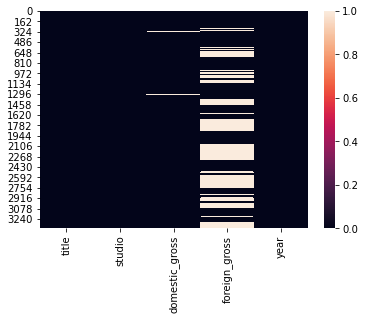

In [8]:
sns.heatmap(df_Movie_gross.isnull())
plt.show()

In [9]:
df_Movie_gross['foreign_gross'] = df_Movie_gross['foreign_gross'].astype(pd.Int64Dtype())


### Dealing with Movies Gross missing data

From the above data we can easily tell that Foreign_gross column has the most missing data of about 40% while studio and domestic_gross is missing 0.1% and 0.8%. I then proceeded to fill the missing data with the mean since the missing data will not wildly affect the data

In [10]:
# Convert 'foreign_gross' from int64 to float64
df_Movie_gross['foreign_gross'] = df_Movie_gross['foreign_gross'].astype(float)

#Filling missing data in domestic_gross with the mean
df_Movie_gross['domestic_gross'].fillna(df_Movie_gross['domestic_gross'].mean(), inplace=True)

#Filling missing data in foreign_gross with the mean
df_Movie_gross['foreign_gross'].fillna(df_Movie_gross['foreign_gross'].mean(), inplace=True)

#Filling missing data in domestic_gross with the mode
df_Movie_gross['studio'].fillna(df_Movie_gross['studio'].mode().iloc[0], inplace=True)

#checking Movie_gross for the changes
df_Movie_gross.head(5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


### Getting the top 5 studios based on both Foreign and Domestic Gross
We will try to see which movie studios have the highest gross for both domestic and foreign markets.

      studio  foreign_gross  domestic_gross
36        BV   2.609408e+10    1.841903e+10
238     Uni.   1.730511e+10    1.290239e+10
246       WB   1.941847e+10    1.216805e+10
93       Fox   2.020598e+10    1.094950e+10
215     Sony   1.424558e+10    8.488429e+09
185     Par.   1.238878e+10    7.685871e+09
134      LGF   5.608475e+09    4.147709e+09
247  WB (NL)   6.414057e+09    3.995700e+09
133     LG/S   3.653952e+09    2.078200e+09
171     P/DW   3.393600e+09    1.682900e+09
      studio  foreign_gross  domestic_gross
36        BV   2.609408e+10    1.841903e+10
93       Fox   2.020598e+10    1.094950e+10
246       WB   1.941847e+10    1.216805e+10
238     Uni.   1.730511e+10    1.290239e+10
215     Sony   1.424558e+10    8.488429e+09
185     Par.   1.238878e+10    7.685871e+09
113      IFC   7.961977e+09    1.703292e+08
148    Magn.   6.584749e+09    6.355970e+07
247  WB (NL)   6.414057e+09    3.995700e+09
78      Eros   5.969254e+09    8.405510e+07


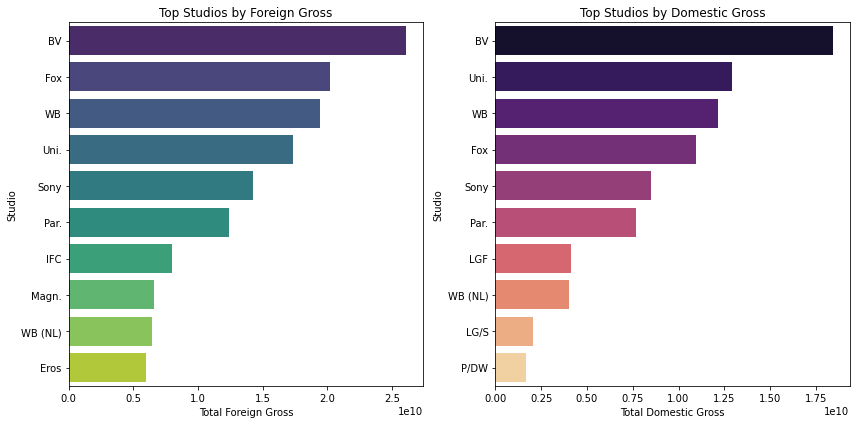

In [11]:
# Grouping by 'studio' and calculate the total 'foreign_gross' and 'domestic_gross' for each studio
grp_studios = df_Movie_gross.groupby('studio').agg({
    'foreign_gross': 'sum',
    'domestic_gross': 'sum'
}).reset_index()

# Sorting foreign and domestic gross for all studios in descending order
sorted_studios_by_foreign_gross = grp_studios.sort_values(by='foreign_gross', ascending=False)
sorted_studios_by_domestic_gross = grp_studios.sort_values(by='domestic_gross', ascending=False)

#Selecting the top 10 studios with the highest foreign and domestic gross
top10_studios_foreign_gross = sorted_studios_by_foreign_gross.head(10)
top10_studios_domestic_gross = sorted_studios_by_domestic_gross.head(10)

print(sorted_studios_by_domestic_gross.head(10))
print(sorted_studios_by_foreign_gross.head(10))

# now plotting the graphs to visualize
plt.figure(figsize=(12, 6))

# Bar plot for the top 10 studios with highest 'foreign_gross'
plt.subplot(1, 2, 1)
sns.barplot(x='foreign_gross', y='studio', data=top10_studios_foreign_gross, palette='viridis')
plt.title('Top Studios by Foreign Gross')
plt.xlabel('Total Foreign Gross')
plt.ylabel('Studio')

# Bar plot for the top 10 studios with highest 'domestic_gross'
plt.subplot(1, 2, 2)
sns.barplot(x='domestic_gross', y='studio', data=top10_studios_domestic_gross, palette='magma')
plt.title('Top Studios by Domestic Gross')
plt.xlabel('Total Domestic Gross')
plt.ylabel('Studio')

plt.tight_layout()
plt.show()

From this data we can deduce the following
* The studio performing exceptionally well in both the foreign and domestic markets is BV. It holds the top position in both categories, indicating its global success with blockbuster movies.

* Fox, WB, Uni, and Sony are among the top studios in both markets, showing their ability to capture international audiences while maintaining a strong presence in the domestic market.

* While some studios, like IFC and Magn have higher 'foreign_gross' revenue while their 'domestic_gross' revenue is relatively lower suggesting that they might be focusig more on international niche markets.

### Looking at the best and worst performing movies in both domestic and foreign markets
We will now look at movies that have the highest gross for both domestic and foreign markets.

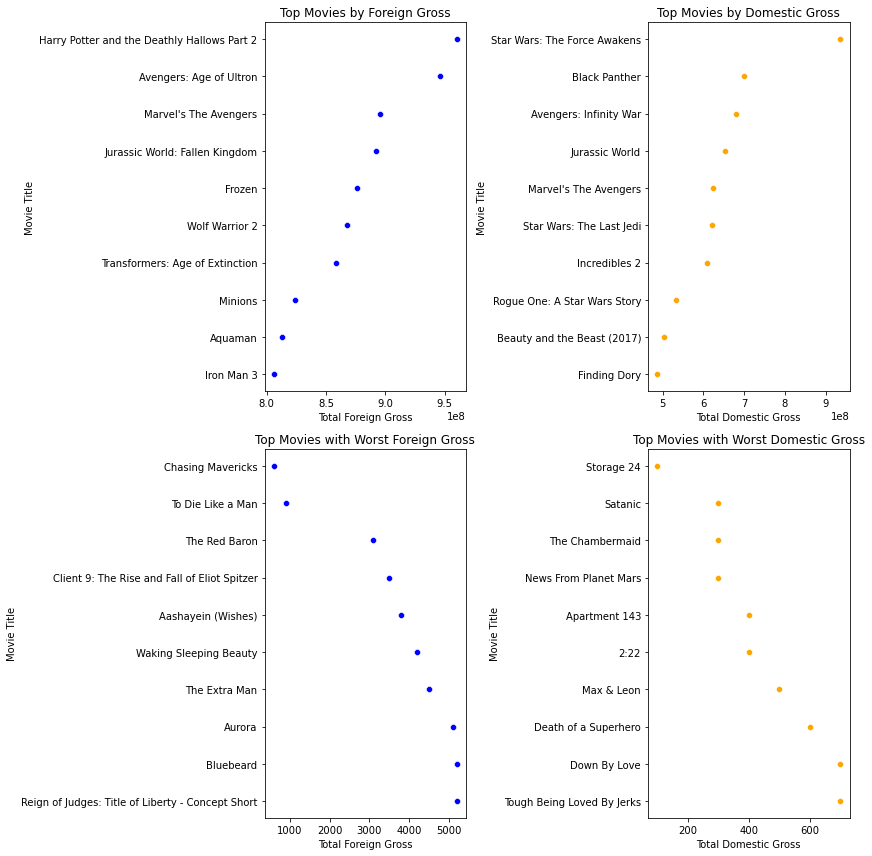

In [12]:
# Sort the DataFrame based on foreign and domestic gross in descending order
sorted_highest_foreign_gross = df_Movie_gross.sort_values(by='foreign_gross', ascending=False)
sorted_highest_domestic_gross = df_Movie_gross.sort_values(by='domestic_gross', ascending=False)

# Sort the DataFrame based on foreign and domestic gross in ascending order
sorted_worst_foreign_gross = df_Movie_gross.sort_values(by='foreign_gross', ascending=True)
sorted_worst_domestic_gross = df_Movie_gross.sort_values(by='domestic_gross', ascending=True)

# Selecting the top 10 movies with the highest foreign and domestic gross
top_highest_movies_foreign_gross = sorted_highest_foreign_gross.head(10)
top_highest_movies_domestic_gross = sorted_highest_domestic_gross.head(10)

# Selecting the top 10 movies with the worst foreign and domestic gross
top_worst_foreign_gross = sorted_worst_foreign_gross.head(10)
top_worst_domestic_gross = sorted_worst_domestic_gross.head(10)

# print(top_worst_foreign_gross)
# print(top_worst_domestic_gross)
# print(top_highest_movies_foreign_gross)
# print(top_highest_movies_domestic_gross)

# Creating Seaborn scatter plots to visualize the results
plt.figure(figsize=(12, 12))

# Scatter plot for top movies with highest foreign gross
plt.subplot(2, 2, 1)
sns.scatterplot(x='foreign_gross', y='title', data=top_highest_movies_foreign_gross, color='blue')
plt.title('Top Movies by Foreign Gross')
plt.xlabel('Total Foreign Gross')
plt.ylabel('Movie Title')

# Scatter plot for top movies with highest domestic gross
plt.subplot(2, 2, 2)
sns.scatterplot(x='domestic_gross', y='title', data=top_highest_movies_domestic_gross, color='orange')
plt.title('Top Movies by Domestic Gross')
plt.xlabel('Total Domestic Gross')
plt.ylabel('Movie Title')

# Scatter plot for top movies with worst foreign gross
plt.subplot(2, 2, 3)
sns.scatterplot(x='foreign_gross', y='title', data=top_worst_foreign_gross, color='blue')
plt.title('Top Movies with Worst Foreign Gross')
plt.xlabel('Total Foreign Gross')
plt.ylabel('Movie Title')

# Scatter plot for top movies with worst domestic gross
plt.subplot(2, 2, 4)
sns.scatterplot(x='domestic_gross', y='title', data=top_worst_domestic_gross, color='orange')
plt.title('Top Movies with Worst Domestic Gross')
plt.xlabel('Total Domestic Gross')
plt.ylabel('Movie Title')

plt.tight_layout()
plt.show()


From the above results we can deduce the following:
* The movies **"Harry Potter and the Deathly Hallows Part 2"** and **"Marvel's The Avengers"** appear in both the top five lists for the foreign and domestic markets. These movies have demonstrated remarkable success in both markets, indicating their broad global appeal.
* **"Jurassic World"** and **"Jurassic World: Fallen Kingdom"** also appear in both lists, showcasing their success in both domestic and foreign audiences.
* Some movies, such as **"Star Wars: The Force Awakens"** and **"Black Panther"** performed exceptionally well in the domestic market but had slightly lower performance in the foreign market compared to the movies in the top five foreign gross list.

_*Movies with Less Success in the Domestic and Foreign Markets:*_

Among the movies listed, **"Wolf Warrior 2"** appears to have achieved less success in both the domestic and foreign markets compared to the top-performing movies. Its 'domestic_gross' is relatively low, and it did not make it to the top five in either category.
Similarly, **"Transformers: Age of Extinction"** and **"Minions"** also appear to have underperformed compared to the top-performing movies in both markets.

### Titles Data 
#### Cleaning and Analysis
We will now move to Title data by first unzipping it and loading it as df_title_basics DataFrame

In [13]:
with gzip.open('imdb.title.basics.csv.gz', 'rb') as d:
    df_title_basics = pd.read_csv(d)
df_title_basics.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [14]:
#checking more info about Titles data
df_title_basics.info()
df_title_basics.shape
df_title_basics.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

### Handling missing data on the Titles Data
Overall, we can tell that the Title Data appears to contain information about various movie and show titles, including their release years, genres, and runtime (if available). However, it has0.01%, 21.7% and 3.7% missing values in the 'original_title', 'runtime_minutes', and 'genres' columns respectively.

We will clean and handle the missing data by the following means:
* Since primary_title is the english title we will not use the original_title since it has various languages there for we will drop the column
* We will Impute Missing Values with Mean for runtime_minutes column
* we will Impute Missing Values with Mode on the genre column

In [15]:
# Calculating the mean of 'runtime_minutes'
mean_runtime_minutes = df_title_basics['runtime_minutes'].mean()

#mode of 'genres'
mode_genres = df_title_basics['genres'].mode().iloc[0]

# Impute missing values with mean for 'runtime_minutes'
df_title_basics['runtime_minutes'].fillna(mean_runtime_minutes, inplace=True)

# Impute missing values with mode for 'genres'
df_title_basics['genres'].fillna(mode_genres, inplace=True)

# Droping the 'original_title' column from df_title_basics
df_title_basics.drop(columns=['original_title'], inplace=True)

# Verify if there are any missing values after imputation
print(df_title_basics.isnull().sum())


tconst             0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


In [16]:
df_title_basics.describe()

,start_year,runtime_minutes
count,146144.000000,146144.000000
mean,2014.621798,86.187247
std,2.733583,147.191268
min,2010.000000,1.000000
25%,2012.000000,75.000000
50%,2015.000000,86.187247
75%,2017.000000,95.000000
max,2115.000000,51420.000000


from the data we can tell that there maybe outliers in the data given the Max start_year is 2115 while max runtime_minutes is 51420 which is a bit unrealistic.
We will therefore us a box plot to see if there are obvious outliers in this data


C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


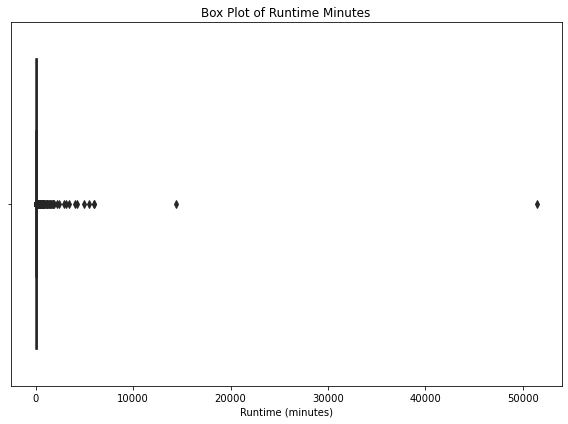

In [17]:
# Create a box plot for 'runtime_minutes'
plt.figure(figsize=(8, 6))
sns.boxplot(df_title_basics['runtime_minutes'], color='purple')
plt.title('Box Plot of Runtime Minutes')
plt.xlabel('Runtime (minutes)')
plt.tight_layout()
plt.show()


We can see that we have two outliers one at above 50000 and the other at above 15000
we will drop those outliers do so that they don't give noise in our analysis

In [18]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df_title_basics['runtime_minutes'].quantile(0.25)
Q3 = df_title_basics['runtime_minutes'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'runtime_minutes' column
df_title_basics = df_title_basics[(df_title_basics['runtime_minutes'] >= lower_bound) & (df_title_basics['runtime_minutes'] <= upper_bound)]

# Display the DataFrame after removing outliers
print(df_title_basics.head())
print(df_title_basics.describe())
print(df_title_basics.info())


      tconst                    primary_title  start_year  runtime_minutes  \
1  tt0066787  One Day Before the Rainy Season        2019       114.000000   
2  tt0069049       The Other Side of the Wind        2018       122.000000   
3  tt0069204                  Sabse Bada Sukh        2018        86.187247   
4  tt0100275         The Wandering Soap Opera        2017        80.000000   
5  tt0111414                      A Thin Life        2018        75.000000   

                 genres  
1       Biography,Drama  
2                 Drama  
3          Comedy,Drama  
4  Comedy,Drama,Fantasy  
5                Comedy  
          start_year  runtime_minutes
count  133149.000000    133149.000000
mean     2014.613365        84.686870
std         2.751199        16.559587
min      2010.000000        45.000000
25%      2012.000000        77.000000
50%      2015.000000        86.187247
75%      2017.000000        93.000000
max      2115.000000       125.000000
<class 'pandas.core.frame.DataFra

### Most produced Genre
Let's find out the leading genre production in our list

Documentary    50199
Drama          45617
Comedy         23483
Thriller       11111
Horror         10544
Action          8839
Romance         8298
Biography       7175
Crime           6130
Adventure       5799
Family          5447
History         5216
Mystery         4352
Music           3811
Fantasy         3285
Sci-Fi          3202
Animation       2641
Sport           1932
War             1237
News            1211
Musical         1206
Western          436
Reality-TV        78
Talk-Show         49
Adult             25
Game-Show          3
Short              2
dtype: int64


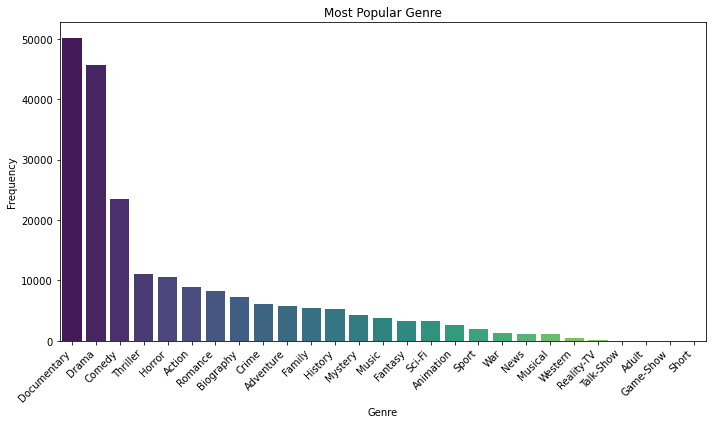

In [19]:
# Count the frequency of each genre
genre_counts = df_title_basics['genres'].str.split(',', expand=True).stack().value_counts()
print(genre_counts)

# Plot the most popular genre using a Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Most Popular Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Rating Data
#### Cleaning and Analysis
We will now move to Title data by first unzipping it and loading it as df_title_ratings DataFrame

In [20]:
with gzip.open('imdb.title.ratings.csv.gz', 'rb') as e:
    df_title_ratings = pd.read_csv(e)
df_title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [21]:
#checking more info about Ratings data
df_title_ratings.info()
df_title_ratings.shape
df_title_ratings.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


tconst           0
averagerating    0
numvotes         0
dtype: int64

In [22]:
df_title_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


### Title and Rating Data Merge
We can tell from the above that Ratings data does not have any missing values
By itself it is not easy to read but it has the same column as Titles Data
We will move and Merge Title data with Ratings data

In [23]:
#inner merging title and rating Data
Title_Rating_Merge = pd.merge(df_title_basics,df_title_ratings, on='tconst',how="inner")
Title_Rating_Merge

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0066787,One Day Before the Rainy Season,2019,114.000000,"Biography,Drama",7.2,43
1,tt0069049,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517
2,tt0069204,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama",6.1,13
3,tt0100275,The Wandering Soap Opera,2017,80.000000,"Comedy,Drama,Fantasy",6.5,119
4,tt0112502,Bigfoot,2017,86.187247,"Horror,Thriller",4.1,32
...,...,...,...,...,...,...,...
68194,tt9913084,Diabolik sono io,2019,75.000000,Documentary,6.2,6
68195,tt9914286,Sokagin Çocuklari,2019,98.000000,"Drama,Family",8.7,136
68196,tt9914642,Albatross,2017,86.187247,Documentary,8.5,8
68197,tt9914942,La vida sense la Sara Amat,2019,86.187247,Documentary,6.6,5


In [24]:
Title_Rating_Merge.info()
Title_Rating_Merge.shape
Title_Rating_Merge.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68199 entries, 0 to 68198
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           68199 non-null  object 
 1   primary_title    68199 non-null  object 
 2   start_year       68199 non-null  int64  
 3   runtime_minutes  68199 non-null  float64
 4   genres           68199 non-null  object 
 5   averagerating    68199 non-null  float64
 6   numvotes         68199 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.2+ MB


tconst             0
primary_title      0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

We now have more more cleaned data that we can generate more analysis that will shade more light on the below questions:
* Analyze how the average ratings and number of votes change over the years.
* Explore which genres tend to receive higher ratings or attract more votes.
* Investigate the relationship between the duration of a title and its average rating.
* Visualize the distribution of average ratings and number of votes across different genres.

### Average ratings and number of votes change over the years.

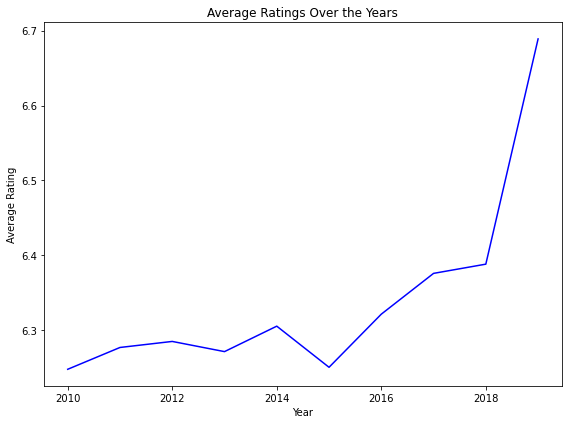

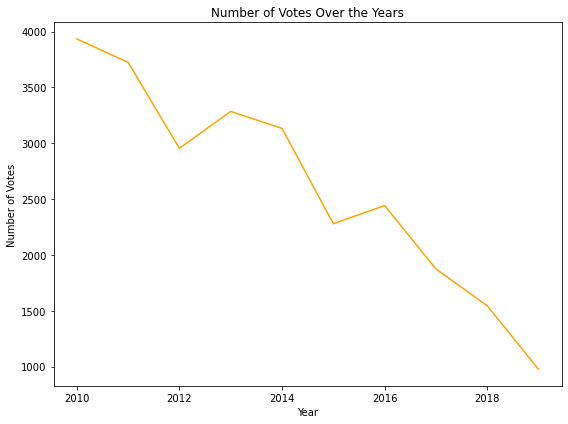

In [25]:
# Line plot for average ratings over the years
plt.figure(figsize=(8, 6))
sns.lineplot(x='start_year', y='averagerating', data=Title_Rating_Merge, ci=None, color='blue')
plt.title('Average Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

# Line plot for number of votes over the years
plt.figure(figsize=(8, 6))
sns.lineplot(x='start_year', y='numvotes', data=Title_Rating_Merge, ci=None, color='orange')
plt.title('Number of Votes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Votes')
plt.tight_layout()
plt.show()


From the above data we can tell that the averagerating for all movies has been increasing over the years from 2010 to 2018 while the opposite has been for the Number of votes over the years. This could be taken to mean that the quality of movies over the years has been on the rising thereby getting higher rating. Therefore Microsoft can focus more on getting higher rating for their movies as opposed to aiming at higher number of votes

### Genres that tend to receive higher ratings or attract more votes

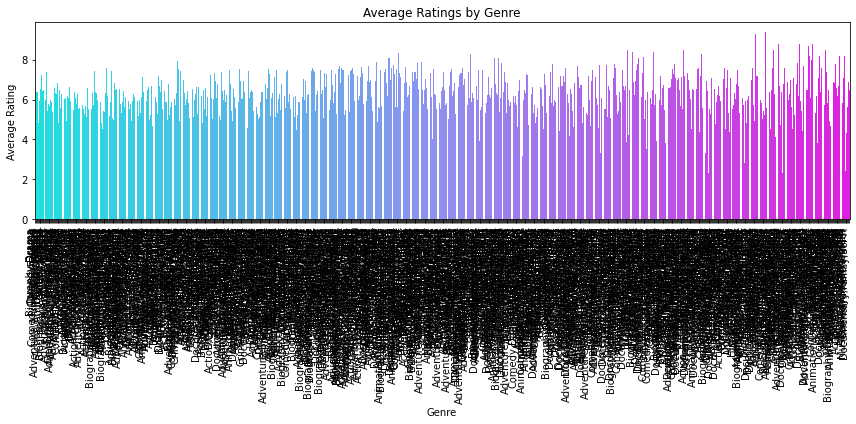

In [26]:
# Count plot for average ratings by genre
plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='averagerating', data=Title_Rating_Merge, ci=None, palette='cool')
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# # Count plot for number of votes by genre
# plt.figure(figsize=(12, 6))
# sns.barplot(x='genres', y='numvotes', data=Title_Rating_Merge, ci=None, palette='magma')
# plt.title('Number of Votes by Genre')
# plt.xlabel('Genre')
# plt.ylabel('Number of Votes')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

From the chart we can tell that genre column data has to many unique values hence making it hard to visualize
To fix this I took the genres column of our DataFrame Title_Rating_Merge and splits each cell into separate genres then I expanded them into separate columns.Then I transformed the columns into rows, creating a new multi-indexed DataFrame.
This resulted is a new DataFrame genre_ratings_votes, where each row corresponds to a genre associated with the original movie/show, along with the corresponding 'averagerating' and 'numvotes' values as below


             genre  averagerating  numvotes
0        Biography            7.2        43
0            Drama            7.2        43
1            Drama            6.9      4517
2           Comedy            6.1        13
2            Drama            6.1        13
...            ...            ...       ...
68195        Drama            8.7       136
68195       Family            8.7       136
68196  Documentary            8.5         8
68197  Documentary            6.6         5
68198  Documentary            6.5        11

[118506 rows x 3 columns]
          genre  averagerating  numvotes
7   Documentary       7.289749   4425856
17         News       7.264273    123041
4     Biography       7.159036  13379374
14        Music       7.062466   4030752
12      History       7.032611   4050337
21        Sport       6.942606   2128285
23          War       6.567487   1524224
15      Musical       6.424232    561768
8         Drama       6.380612  83274770
9        Family       6.361492   57

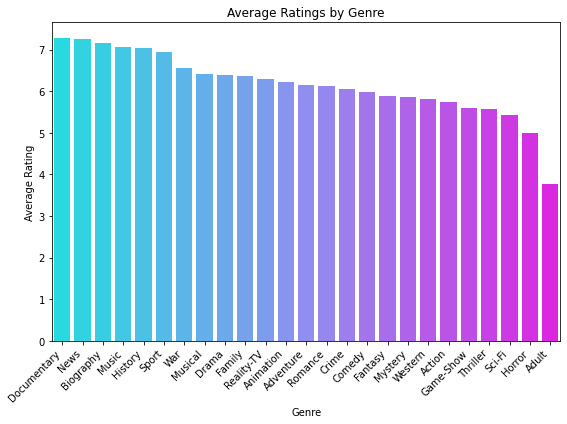

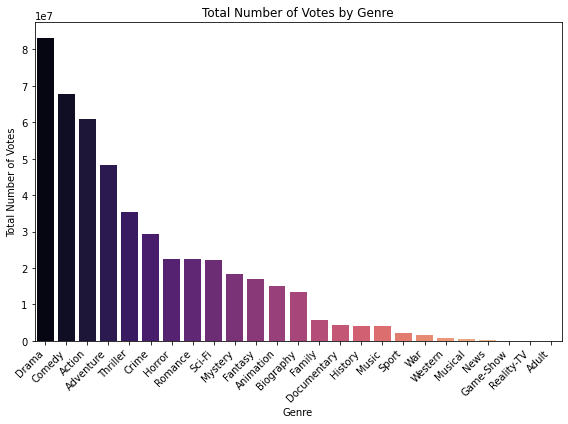

In [27]:
# Create a new DataFrame to extract genres and corresponding ratings and votes
genre_ratings_votes = Title_Rating_Merge['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
genre_ratings_votes = pd.merge(genre_ratings_votes, Title_Rating_Merge[['averagerating', 'numvotes']], left_index=True, right_index=True)

print(genre_ratings_votes)
# Calculate the mean average rating and total number of votes for each genre
genre_ratings_votes_agg = genre_ratings_votes.groupby('genre').agg({'averagerating': 'mean', 'numvotes': 'sum'}).reset_index()

# Sort genres by average rating in descending order
genre_ratings_votes_agg = genre_ratings_votes_agg.sort_values(by='averagerating', ascending=False)
print(genre_ratings_votes_agg)

# Create a bar plot for average ratings by genre
plt.figure(figsize=(8, 6))
sns.barplot(x='genre', y='averagerating', data=genre_ratings_votes_agg, palette='cool')
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Sort genres by total number of votes in descending order
genre_ratings_votes_agg = genre_ratings_votes_agg.sort_values(by='numvotes', ascending=False)

# Create a bar plot for total number of votes by genre
plt.figure(figsize=(8, 6))
sns.barplot(x='genre', y='numvotes', data=genre_ratings_votes_agg, palette='magma')
plt.title('Total Number of Votes by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Number of Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



From the resulting data we can see that Documentaries genre has the highest rating of 7.289749, indicating that, on average, viewers have given them a positive score while Drama genre has an average rating of 6.380612 with a staggering number of votes, 83,274,770. This suggests that Drama movies are quite popular and have been watched and rated by a significant number of viewers.
On the other hand, the Adult genre has the lowest average rating of 3.766667 and has received only 164 votes. This indicates that Adult movies, on average, are not as well-received and are watched and rated by fewer viewers

We can conclude by saying that Documetaries and Drama would give better audience interaction and ratings

### Investigating the relationship between the duration of a title and its average rating

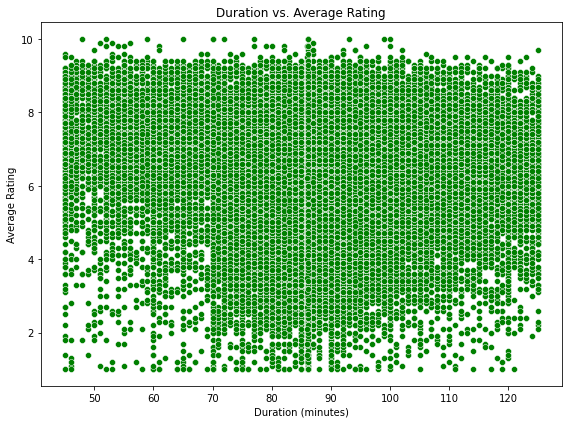

                 runtime_minutes  averagerating
runtime_minutes         1.000000       0.128788
averagerating           0.128788       1.000000


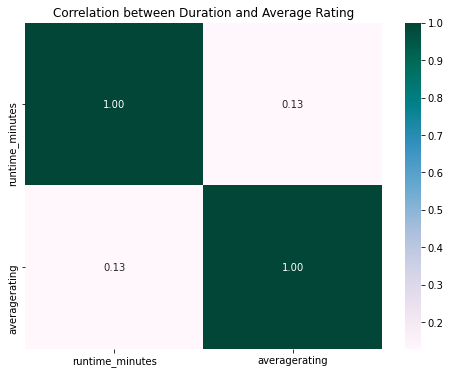

In [44]:
# Create a scatter plot for duration versus average rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='runtime_minutes', y='averagerating', data=Title_Rating_Merge, color='green')
plt.title('Duration vs. Average Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

duration_averagerating_correlation = combined_Title_Rating_Gross[['runtime_minutes', 'averagerating']].corr()
print(duration_averagerating_correlation)

# Create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(duration_averagerating_correlation, annot=True, cmap= 'PuBuGn', fmt='.2f')
plt.title('Correlation between Duration and Average Rating')
plt.show()


From the the results we can see that he rating are evenly distributed on all the time. We can confidently conclude that the duration of the movie does not affect the rating of the movies

## Title and Rating Data Merge with Movies Gross Data
Now we will combine all our data into one combined data to allow us to analyze how they are all related

In [29]:
# Performing an inner merge based on 'primary_title' and 'title'
combined_Title_Rating_Gross = Title_Rating_Merge.merge(df_Movie_gross, left_on='primary_title', right_on='title', how='inner')

# Step 2: Drop the duplicate 'title' column from the merged DataFrame
combined_Title_Rating_Gross.drop('title', axis=1, inplace=True)
# Display the new combined_Title_Rating_Gross DataFrame
# combined_Title_Rating_Gross.head()
combined_Title_Rating_Gross.info()
combined_Title_Rating_Gross.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2530 non-null   object 
 1   primary_title    2530 non-null   object 
 2   start_year       2530 non-null   int64  
 3   runtime_minutes  2530 non-null   float64
 4   genres           2530 non-null   object 
 5   averagerating    2530 non-null   float64
 6   numvotes         2530 non-null   int64  
 7   studio           2530 non-null   object 
 8   domestic_gross   2530 non-null   float64
 9   foreign_gross    2530 non-null   float64
 10  year             2530 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 237.2+ KB


Index(['tconst', 'primary_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'studio', 'domestic_gross',
       'foreign_gross', 'year'],
      dtype='object')

Now adding a total gross revenue column to the marged data

In [37]:
#Adding total gross column
combined_Title_Rating_Gross['total_gross'] = combined_Title_Rating_Gross['domestic_gross'] + combined_Title_Rating_Gross['foreign_gross']
combined_Title_Rating_Gross

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,7.505704e+07,2016,7.615704e+07
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8.000000e+06,2012,8.744000e+06
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8.000000e+06,2012,8.744000e+06
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8.000000e+06,2012,8.744000e+06
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,1.299000e+08,2013,1.881000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
2525,tt8119752,Gonjiam: Haunted Asylum,2018,95.0,"Horror,Mystery",6.1,2585,WGUSA,115000.0,7.505704e+07,2018,7.517204e+07
2526,tt8331988,The Chambermaid,2018,102.0,Drama,7.1,147,FM,300.0,7.505704e+07,2015,7.505734e+07
2527,tt8404272,How Long Will I Love U,2018,101.0,Romance,6.5,607,WGUSA,747000.0,8.210000e+07,2018,8.284700e+07
2528,tt9078374,Last Letter,2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,7.505704e+07,2018,7.523804e+07


#### Investigating the correlation between gross of a movie and it's averagerating

               total_gross  averagerating
total_gross       1.000000       0.071534
averagerating     0.071534       1.000000


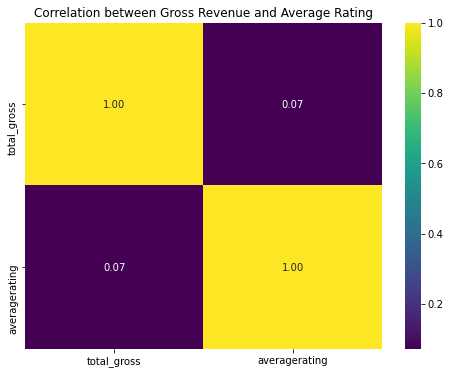

In [39]:
# Calculate the correlation matrix
gross_averagerating_correlation = combined_Title_Rating_Gross[['total_gross', 'averagerating']].corr()
print(gross_averagerating_correlation)

# Create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(gross_averagerating_correlation, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation between Gross Revenue and Average Rating')
plt.show()

From the data we can see there is a positive but weak correlation between gross revenue and it's averagerating.
This means we will recommend for all the movies to aim at getting higher ratings

#### Investigetting the highest grossing genres

In [35]:


# Create a new DataFrame to extract genres and corresponding gross
genre_gross = combined_Title_Rating_Gross['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
genre_gross_merge = pd.merge(genre_gross, combined_Title_Rating_Gross[['foreign_gross', 'domestic_gross']], left_index=True, right_index=True)


# Calculating the mean average foreign and domestic gross for each genre
genre_gross_merg_agg = genre_gross_merge.groupby('genre').agg({'foreign_gross': 'mean', 'domestic_gross': 'mean'}).reset_index()

print(genre_gross_merg_agg)
# # Sort genres by foreign gross in descending order
# genre_gross_merg_agg = genre_ratings_votes_agg.sort_values(by='foreign_gross', ascending=False)

# # Sort genres by domestic gross in descending order
# genre_gross_merg_domestic_agg = genre_ratings_votes_agg.sort_values(by='domestic_gross', ascending=False)

# # Plot the top genres with the highest domestic gross revenue
# plt.figure(figsize=(10, 6))
# sns.barplot(x=genre_gross_merg_domestic_agg['genre'], y=genre_gross_merg_domestic_agg['domestic_gross'], palette='viridis')
# plt.xticks(rotation=90)
# plt.title('Top Genres by domestic gross Revenue')
# plt.xlabel('Genre')
# plt.ylabel('domestic gross Revenue (USD)')
# plt.tight_layout()
# plt.show()


# # Plot the top genres with the highest foreign gross revenue
# plt.figure(figsize=(10, 6))
# sns.barplot(x=genre_gross_merg_agg['genre'], y=genre_gross_merg_agg['foreign_gross'], palette='viridis')
# plt.xticks(rotation=90)
# plt.title('Top Genres by foreign gross Revenue')
# plt.xlabel('Genre')
# plt.ylabel('foreign_gross Revenue (USD)')
# plt.tight_layout()
# plt.show()




          genre  foreign_gross  domestic_gross
0        Action   9.733549e+07    4.459468e+07
1     Adventure   1.479219e+08    7.339713e+07
2     Animation   1.840811e+08    9.048703e+07
3     Biography   5.343471e+07    1.362742e+07
4        Comedy   7.487339e+07    3.614172e+07
5         Crime   4.789612e+07    2.294187e+07
6   Documentary   6.048852e+07    1.383422e+07
7         Drama   5.313130e+07    1.466864e+07
8        Family   7.896984e+07    4.305242e+07
9       Fantasy   9.186447e+07    3.687467e+07
10      History   5.580131e+07    1.429707e+07
11       Horror   5.823745e+07    2.666465e+07
12        Music   4.352373e+07    1.470982e+07
13      Musical   8.471271e+07    4.497963e+07
14      Mystery   5.749897e+07    2.159876e+07
15         News   6.709278e+07    5.410350e+06
16      Romance   5.180217e+07    1.686673e+07
17       Sci-Fi   1.052660e+08    6.193067e+07
18        Sport   7.666866e+07    3.929691e+07
19     Thriller   6.169143e+07    2.371612e+07
20          W

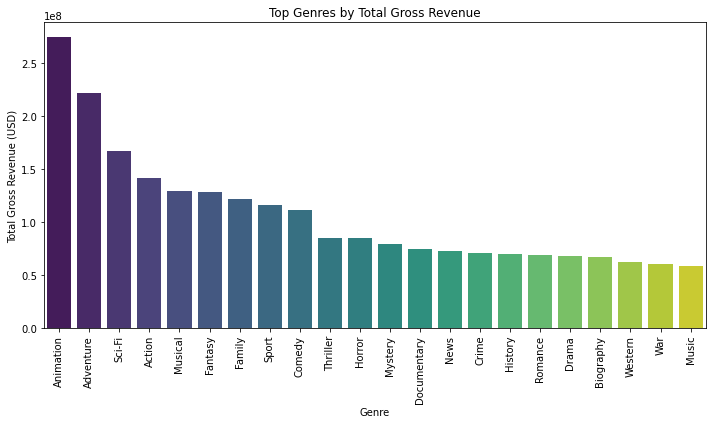

In [36]:
# Create a new DataFrame to extract genres and corresponding gross
genre_gross = combined_Title_Rating_Gross['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
genre_gross_merge = pd.merge(genre_gross, combined_Title_Rating_Gross['total_gross'], left_index=True, right_index=True)


# Calculating the mean average foreign and domestic gross for each genre
genre_gross_merg_agg = genre_gross_merge.groupby('genre').agg({'total_gross': 'mean'}).reset_index()

# Sort genres by foreign gross in descending order
genre_gross_merg_agg = genre_gross_merg_agg.sort_values(by='total_gross', ascending=False)

# Sort genres by domestic gross in descending order
# genre_gross_merg_domestic_agg = genre_gross_merg_agg.sort_values(by='domestic_gross', ascending=False)
# print(genre_gross_merg_domestic_agg)
# Plot the top genres with the highest foreign gross revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_gross_merg_agg['genre'], y=genre_gross_merg_agg['total_gross'], palette='viridis')
plt.xticks(rotation=90)
plt.title('Top Genres by Total Gross Revenue')
plt.xlabel('Genre')
plt.ylabel('Total Gross Revenue (USD)')
plt.tight_layout()
plt.show()

In [ ]:
From the above data we 

In [ ]:
# Box plot for distribution of average ratings by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='averagerating', data=Title_Rating_Merge, palette='viridis')
plt.title('Distribution of Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Box plot for distribution of number of votes by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='numvotes', data=Title_Rating_Merge, palette='inferno')
plt.title('Distribution of Number of Votes by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
df_title_basics['genres'].unique


In [ ]:
with gzip.open('imdb.title.ratings.csv.gz', 'rb') as e:
    df_title_ratings = pd.read_csv(e)
df_title_ratings

In [ ]:
basics_title_inner = pd.merge(df_title_basics,df_title_ratings, on='tconst',how="inner")
basics_title_inner

In [ ]:
basics_title_inner.isna().sum()

In [ ]:
gross_basics_title = pd.merge(basics_title_inner,df_Movie_gross,left_on='primary_title',right_on='title',how='inner')
gross_basics_title

In [ ]:
gross_basics_title.isna().sum()

In [ ]:
gross_basics_title.describe()


In [ ]:
gross_basics_title.info()

In [ ]:
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce').astype(float).astype('Int64')

In [ ]:
gross_basics_title.info()


In [ ]:
with gzip.open('zippedData/tmdb.movies.csv.gz', 'rb') as i:
    df_tmdb_movies = pd.read_csv(i)
df_tmdb_movies